In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import folium 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [7]:
# Date sütunundan year ve month adlı sütunlar oluşturuyorum
df["Year"] = df["Date"].apply(lambda x:x.split("-")[0])
df["Month"] = df["Date"].apply(lambda x:x.split("-")[1])

In [8]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
Year                  0
Month                 0
dtype: int64

In [9]:
df.drop("Province/State", axis=1, inplace=True)

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.set_index("Date", inplace=True)

In [12]:
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]

In [13]:
df.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month
Date,,,,,,,,,,
2020-01-22,Afghanistan,33.93911,67.709953,0,0,0,0,Eastern Mediterranean,2020,01
2020-01-22,Albania,41.15330,20.168300,0,0,0,0,Europe,2020,01
2020-01-22,Algeria,28.03390,1.659600,0,0,0,0,Africa,2020,01
2020-01-22,Andorra,42.50630,1.521800,0,0,0,0,Europe,2020,01
2020-01-22,Angola,-11.20270,17.873900,0,0,0,0,Africa,2020,01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49068 entries, 2020-01-22 to 2020-07-27
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Confirmed       49068 non-null  int64  
 4   Deaths          49068 non-null  int64  
 5   Recovered       49068 non-null  int64  
 6   Active          49068 non-null  int64  
 7   WHO Region      49068 non-null  object 
 8   Year            49068 non-null  object 
 9   Month           49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.1+ MB


In [15]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [16]:
df["Country/Region"].nunique()

187

# <p style="color:#3366FF;"> <b> Hangi ülke en çok covid-19 ölüm sayısına sahip ve aynı sırayla diğer ilk 15 ülke arasında nasıl bir seyir izliyor? </b>

In [17]:
sumd = df.groupby("Country/Region").sum(numeric_only=True)
sumd

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
Afghanistan,6380.552680,12729.471164,1936390,49098,798240,1089052
Albania,7736.820400,3791.640400,196702,5708,118877,72117
Algeria,5270.373200,312.004800,1179755,77972,755897,345886
Andorra,7991.184400,286.098400,94404,5423,69074,19907
Angola,-2106.107600,3360.293200,22662,1078,6573,15011
...,...,...,...,...,...,...
West Bank and Gaza,6007.013600,6623.841600,233461,1370,61124,170967
Western Sahara,4552.514000,-2422.530400,901,63,648,190
Yemen,2923.912676,9121.080944,67180,17707,23779,25694


In [18]:
sumd.drop(["Lat", "Long"], axis=1, inplace=True)

In [19]:
sumd

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


In [20]:
deaths = sumd.Deaths.sort_values(ascending=False)
deaths

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
                    ...   
Bhutan                   0
Mongolia                 0
Timor-Leste              0
Seychelles               0
Greenland                0
Name: Deaths, Length: 187, dtype: int64

<Axes: title={'center': 'Top 15 Countries for Covid 19 DEATH COUNT'}, xlabel='Country', ylabel='Death Count'>

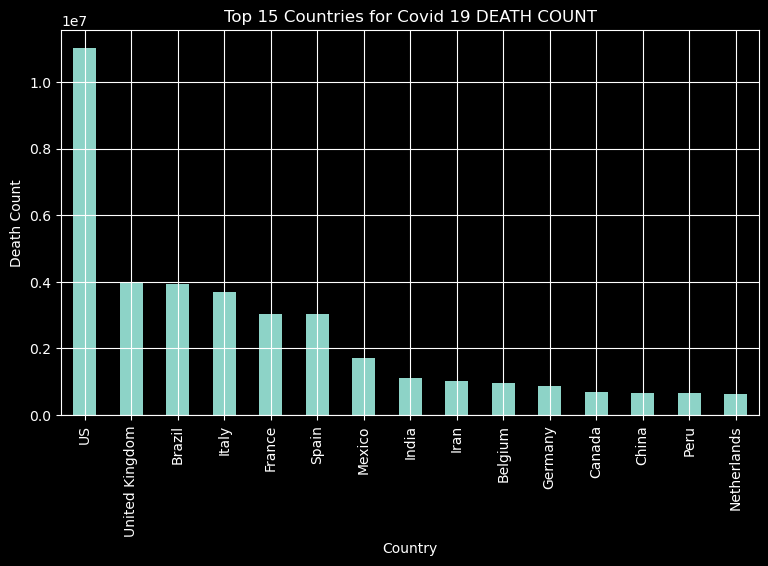

In [21]:
plt.style.use("dark_background")
plt.figure(figsize=(9,5))
deaths.head(15).plot(kind = "bar", grid = True, xlabel = "Country", ylabel="Death Count",
                     title="Top 15 Countries for Covid 19 DEATH COUNT")

### <p style="color:#4D1B7B;"> <b> En fazla ölümün açık ara farkla Amerika'da olduğunu söyleyebiliriz. </b>

# <p style="color:#3366FF;"> <b> Türkiye'nin covid-19 eğilimlerini inceleyelim </b>

In [22]:
turkey = df[df["Country/Region"] == "Turkey"]

In [23]:
turkey

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month
Date,,,,,,,,,,
2020-01-22,Turkey,38.9637,35.2433,0,0,0,0,Europe,2020,01
2020-01-23,Turkey,38.9637,35.2433,0,0,0,0,Europe,2020,01
2020-01-24,Turkey,38.9637,35.2433,0,0,0,0,Europe,2020,01
2020-01-25,Turkey,38.9637,35.2433,0,0,0,0,Europe,2020,01
2020-01-26,Turkey,38.9637,35.2433,0,0,0,0,Europe,2020,01
...,...,...,...,...,...,...,...,...,...,...
2020-07-23,Turkey,38.9637,35.2433,223315,5563,206365,11387,Europe,2020,07
2020-07-24,Turkey,38.9637,35.2433,224252,5580,207374,11298,Europe,2020,07
2020-07-25,Turkey,38.9637,35.2433,225173,5596,208477,11100,Europe,2020,07


In [24]:
month = turkey.groupby("Month").sum(numeric_only=True)
month

,Lat,Long,Confirmed,Deaths,Recovered,Active
Month,,,,,,
01,389.6370,352.4330,0,0,0,0
02,1129.9473,1022.0557,0,0,0,0
03,1207.8747,1092.5423,58776,976,674,57126
04,1168.9110,1057.2990,2098207,49592,376670,1671945
05,1207.8747,1092.5423,4521709,124363,3146528,1250818
06,1168.9110,1057.2990,5429570,145450,4558677,725443
07,1052.0199,951.5691,5795083,145675,5262840,386568


<Axes: title={'center': 'COVID 19 data of TURKEY from 1st to 7th month'}, xlabel='Month', ylabel='Count'>

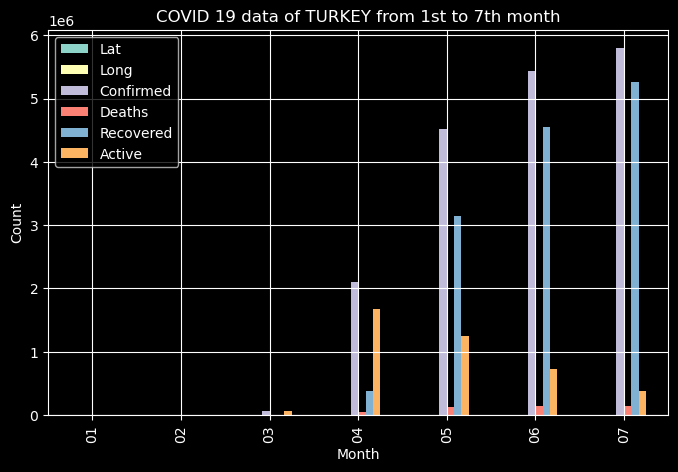

In [25]:
month.plot(figsize=(8,5), kind="bar", grid=True, xlabel="Month", ylabel="Count",
           title="COVID 19 data of TURKEY from 1st to 7th month")

### <p style="color:#4D1B7B;"> <b> Covid-19 gittikçe şiddetli hale gelmiş. </b>

# <p style="color:#3366FF;"> <b> Türkiye'de iyileşen ve aktif olan ölüm vakalarını karşılaştıralım </b>

In [26]:
turkey_sum = sumd.loc["Turkey"]
turkey_sum

Confirmed    17903345
Deaths         466056
Recovered    13345389
Active        4091900
Name: Turkey, dtype: int64

<Axes: title={'center': 'COVID 19 data of TURKEY'}, xlabel='Type', ylabel='Count'>

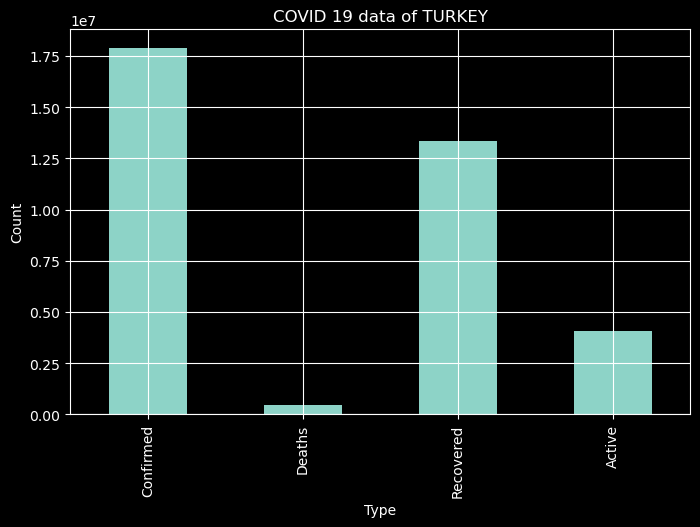

In [27]:
turkey_sum.plot(figsize=(8,5), kind = "bar", grid = True, xlabel = "Type", ylabel = "Count",
               title="COVID 19 data of TURKEY")

### <p style="color:#4D1B7B;"> <b> Teyit edilmiş ve iyileşmiş vakalarla karşılaştırıldığında , ölüm sayısı etkin bir şekilde düşüktür. Hastaların iyileşmesi iyi miktarda gerçekleşmektedir. </b>

# <p style="color:#3366FF;"> <b> Her ülke için toplam vaka sayısına sahip bir veri çerçevesi oluşturalım </b>

In [70]:
onaylanmis_vakalar = pd.DataFrame(df.groupby("Country/Region")["Confirmed"].sum())
onaylanmis_vakalar["Country/Region"] = onaylanmis_vakalar.index
onaylanmis_vakalar.index = np.arange(1,188)

olum_vakalari = pd.DataFrame(df.groupby("Country/Region")["Deaths"].sum())
olum_vakalari["Country/Region"] = olum_vakalari.index
olum_vakalari.index = np.arange(1,188)

kurtarilan_vakalar = pd.DataFrame(df.groupby("Country/Region")["Recovered"].sum())
kurtarilan_vakalar["Country/Region"] = kurtarilan_vakalar.index
kurtarilan_vakalar.index = np.arange(1,188)

aktif_vakalar = pd.DataFrame(df.groupby("Country/Region")["Active"].sum())
aktif_vakalar["Country/Region"] = aktif_vakalar.index
aktif_vakalar.index = np.arange(1,188)

aktif_vakalar = aktif_vakalar[["Country/Region", "Active"]]
olum_vakalari = olum_vakalari[["Country/Region", "Deaths"]]
kurtarilan_vakalar = kurtarilan_vakalar[["Country/Region", "Recovered"]]
onaylanmis_vakalar = onaylanmis_vakalar[["Country/Region", "Confirmed"]]

pio.templates.default = "plotly_dark"


fig = px.bar(onaylanmis_vakalar.sort_values("Confirmed", ascending=False)[:20][::-1],
             x = "Confirmed", y = "Country/Region", title = "Confirmed Cases Worldwide",
             text="Confirmed", height=900, orientation="h")
fig.show()

fig = px.bar(olum_vakalari.sort_values("Deaths", ascending=False)[:20][::-1],
             x = "Deaths", y = "Country/Region", title = "Deaths Cases Worldwide",
             text="Deaths", height=900, orientation="h")
fig.show()

fig = px.bar(kurtarilan_vakalar.sort_values("Recovered", ascending=False)[:20][::-1],
             x = "Recovered", y = "Country/Region", title = "Recovered Cases Worldwide",
             text="Recovered", height=900, orientation="h")
fig.show()

fig = px.bar(aktif_vakalar.sort_values("Active", ascending=False)[:20][::-1],
             x = "Active", y = "Country/Region", title = "Active Cases Worldwide",
             text="Active", height=900, orientation="h")
fig.show()

### <p style="color:#4D1B7B;"> <b> Amerika en çok ölüm, kurtarılan, onaylanan ve aktif vakalara sahip olan ülkedir. </b>

### <p style="color:#4D1B7B;"> <b> Amerika'yı Brezilya, Rusya, Hindistan gibi ülkeler takip etmektedir. </b>

In [29]:
date = df.groupby(df.index)["Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

In [30]:
from plotly.subplots import make_subplots

In [31]:
import kaleido

In [32]:
import plotly.io as pio
pio.orca.config.executable = 'orca'

In [33]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Confirmed", "Deaths", "Recovered", "Active"))

trace1 = go.Scatter(
                x = date["Date"],
                y = date["Confirmed"],
                name="Confirmed",
                line_color="orange",
                mode="lines+markers",
                opacity=0.8)

trace2 = go.Scatter(
                x = date["Date"],
                y = date["Deaths"],
                name="Deaths",
                line_color="red",
                mode="lines+markers",
                opacity=0.8)

trace3 = go.Scatter(
                x = date["Date"],
                y = date["Recovered"],
                name="Recovered",
                line_color="green",
                mode="lines+markers",
                opacity=0.8)

trace4 = go.Scatter(
                x = date["Date"],
                y = date["Active"],
                name="Active",
                line_color="blue",
                mode="lines+markers",
                opacity=0.8)
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title_text="<b>Global Spread of the Coronavirus Over Time </b>",
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color="white"))

fig.show()

### <p style="color:#4D1B7B;"> <b> Onaylanmış vakalar 16 milyondan fazla, ölümler ise 600 binden fazla iken iyileşen vakalar 10 milyon üstü, aktif vakalar da 6 milyondan fazladır. </b>

In [34]:
us = df[df["Country/Region"] == "US"].reset_index()
us_date = us.groupby("Date")["Date", "Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

brezilya = df[df["Country/Region"] == "Brazil"].reset_index()
brezilya_date = brezilya.groupby("Date")["Date", "Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

uk = df[df["Country/Region"] == "United Kingdom"].reset_index()
uk_date = uk.groupby("Date")["Date", "Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

rusya = df[df["Country/Region"] == "Russia"].reset_index()
rusya_date = rusya.groupby("Date")["Date", "Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

geri_kalan = df[~df["Country/Region"].isin(["US", "Brazil", "United Kingdom", "Russia"])].reset_index()
geri_kalan_date = geri_kalan.groupby("Date")["Date", "Confirmed", "Deaths", "Recovered", "Active"].sum().reset_index()

# <p style="color:#3366FF;"> <b> US </b>

In [35]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Confirmed", "Deaths", "Recovered", "Active"))

trace1 = go.Scatter(x = us_date["Date"],
                    y = us_date["Confirmed"],
                    name = "Confirmed",
                    line_color = "orange",
                    mode = "lines+markers",
                    opacity=0.8)

trace2 = go.Scatter(x = us_date["Date"],
                    y = us_date["Deaths"],
                    name = "Confirmed",
                    line_color = "red",
                    mode = "lines+markers",
                    opacity=0.8)

trace3 = go.Scatter(x = us_date["Date"],
                    y = us_date["Recovered"],
                    name = "Confirmed",
                    line_color = "green",
                    mode = "lines+markers",
                    opacity=0.8)

trace4 = go.Scatter(x = us_date["Date"],
                    y = us_date["Active"],
                    name = "Confirmed",
                    line_color = "blue",
                    mode = "lines+markers",
                    opacity=0.8)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title_text = "<b>Spread of the Coronavirus Over Time in US (TOP 1)</b>",
                  font = dict(family = "Arial, Balto, Courier New, Droid Sans"))
fig.show()

from folium import plugins

latitude = 38.9072
longitude = -77.0369
world_map = folium.Map(location=[latitude, longitude], zoom_start=3.5, tiles="Stamen Toner")

for lat, lon, Confirmed, Deaths, Recovered, name in zip(us["Lat"], us["Long"], us["Confirmed"], us["Deaths"], us["Recovered"],
                                                        us["Country/Region"]):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ("<strong>Country</strong>:" + str(name).capitalize() + "<br>"
                                 "<strong>Confirmed Cases</strong>:" + str(Confirmed) + "<br>"
                                 "<strong>Recovered Cases</strong>:" + str(Recovered) + "<br>"
                                 "<strong>Deaths Cases</strong>:" + str(Deaths) + "<br>"),
                        color = "red",
                        fill_color = "red",
                        fill_opacity = 0.7).add_to(world_map)
world_map 

# <p style="color:#3366FF;"> <b> Brazil </b>

In [36]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Confirmed", "Deaths", "Recovered", "Active"))

trace1 = go.Scatter(x = brezilya_date["Date"],
                    y = brezilya_date["Confirmed"],
                    name = "Confirmed",
                    line_color = "orange",
                    mode = "lines+markers",
                    opacity=0.8)

trace2 = go.Scatter(x = brezilya_date["Date"],
                    y = brezilya_date["Deaths"],
                    name = "Confirmed",
                    line_color = "red",
                    mode = "lines+markers",
                    opacity=0.8)

trace3 = go.Scatter(x = brezilya_date["Date"],
                    y = brezilya_date["Recovered"],
                    name = "Confirmed",
                    line_color = "green",
                    mode = "lines+markers",
                    opacity=0.8)

trace4 = go.Scatter(x = brezilya_date["Date"],
                    y = brezilya_date["Active"],
                    name = "Confirmed",
                    line_color = "blue",
                    mode = "lines+markers",
                    opacity=0.8)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title_text = "<b>Spread of the Coronavirus Over Time in BRAZİL (TOP 2)</b>",
                  font = dict(family = "Arial, Balto, Courier New, Droid Sans"))
fig.show()

In [37]:
fig = make_subplots(rows=1, cols=4, subplot_titles=("Confirmed", "Deaths", "Recovered", "Active"))

trace1 = go.Scatter(x = rusya_date["Date"],
                    y = rusya_date["Confirmed"],
                    name = "Confirmed",
                    line_color = "orange",
                    mode = "lines+markers",
                    opacity=0.8)

trace2 = go.Scatter(x = rusya_date["Date"],
                    y = rusya_date["Deaths"],
                    name = "Confirmed",
                    line_color = "red",
                    mode = "lines+markers",
                    opacity=0.8)

trace3 = go.Scatter(x = rusya_date["Date"],
                    y = rusya_date["Recovered"],
                    name = "Confirmed",
                    line_color = "green",
                    mode = "lines+markers",
                    opacity=0.8)

trace4 = go.Scatter(x = rusya_date["Date"],
                    y = rusya_date["Active"],
                    name = "Confirmed",
                    line_color = "blue",
                    mode = "lines+markers",
                    opacity=0.8)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig.update_layout(title_text = "<b>Spread of the Coronavirus Over Time in RUSSIA (TOP 3)</b>",
                  font = dict(family = "Arial, Balto, Courier New, Droid Sans"))
fig.show()

# <p style="color:#3366FF;"> <b> Vakaları karşılaştıralım </b>

In [38]:
temp = df.groupby("Date")["Recovered", "Deaths", "Active"].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=["Recovered", "Deaths", "Active"],
          var_name="case", value_name="count")
fig = px.area(temp, x = "Date", y = "count", color = "case",
              title = "Cases over time: Area Plot", color_discrete_sequence=["cyan", "red", "orange"])
fig.show()

# <p style="color:#3366FF;"> <b> Korelasyon Matrisi </b>

In [39]:
corr = df.corr(numeric_only=True)

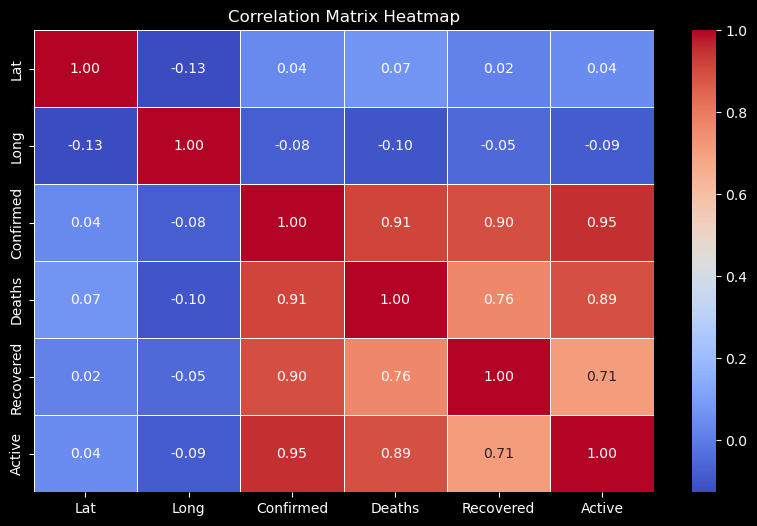

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [41]:
df.corr(numeric_only=True)["Deaths"].sort_values()

Long        -0.101340
Lat          0.070040
Recovered    0.763090
Active       0.891858
Confirmed    0.912361
Deaths       1.000000
Name: Deaths, dtype: float64

# <p style="color:#3366FF;"> <b> Model Eğitimi </b>

In [42]:
y = df["Deaths"].values
x = df.drop(['Country/Region', 'Lat', 'Long', 'Deaths', 'WHO Region', 'Year', 'Month'], axis=1).values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(32875, 3)

In [49]:
model = Sequential()

model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(6, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [50]:
model.fit(x = X_train, y = y_train, validation_data=(X_test,y_test), batch_size=200, epochs=200)

Epoch 1/200
165/165 [==============================] - 3s 7ms/step - loss: 45060464.0000 - val_loss: 31668092.0000
Epoch 2/200
165/165 [==============================] - 1s 4ms/step - loss: 45048536.0000 - val_loss: 31644704.0000
Epoch 3/200
165/165 [==============================] - 1s 5ms/step - loss: 44972308.0000 - val_loss: 31526410.0000
Epoch 4/200
165/165 [==============================] - 1s 4ms/step - loss: 44725444.0000 - val_loss: 31236202.0000
Epoch 5/200
165/165 [==============================] - 1s 4ms/step - loss: 44255104.0000 - val_loss: 30845160.0000
Epoch 6/200
165/165 [==============================] - 1s 4ms/step - loss: 43725620.0000 - val_loss: 30572172.0000
Epoch 7/200
165/165 [==============================] - 1s 4ms/step - loss: 43370380.0000 - val_loss: 30433218.0000
Epoch 8/200
165/165 [==============================] - 1s 4ms/step - loss: 43127584.0000 - val_loss: 30289072.0000
Epoch 9/200
165/165 [==============================] - 1s 5ms/step - loss: 42872

165/165 [==============================] - 1s 3ms/step - loss: 6413010.5000 - val_loss: 5596475.0000
Epoch 73/200
165/165 [==============================] - 1s 4ms/step - loss: 6380266.0000 - val_loss: 5574756.5000
Epoch 74/200
165/165 [==============================] - 1s 4ms/step - loss: 6350638.0000 - val_loss: 5550646.0000
Epoch 75/200
165/165 [==============================] - 1s 4ms/step - loss: 6322550.5000 - val_loss: 5527397.0000
Epoch 76/200
165/165 [==============================] - 1s 4ms/step - loss: 6289918.0000 - val_loss: 5499080.5000
Epoch 77/200
165/165 [==============================] - 1s 3ms/step - loss: 6262962.5000 - val_loss: 5468806.5000
Epoch 78/200
165/165 [==============================] - 1s 4ms/step - loss: 6236358.0000 - val_loss: 5453318.0000
Epoch 79/200
165/165 [==============================] - 1s 4ms/step - loss: 6198950.5000 - val_loss: 5431293.0000
Epoch 80/200
165/165 [==============================] - 1s 4ms/step - loss: 6176319.0000 - val_loss: 

165/165 [==============================] - 1s 4ms/step - loss: 5446000.0000 - val_loss: 4805885.0000
Epoch 144/200
165/165 [==============================] - 1s 4ms/step - loss: 5447164.0000 - val_loss: 4801908.0000
Epoch 145/200
165/165 [==============================] - 1s 4ms/step - loss: 5439666.0000 - val_loss: 4794094.5000
Epoch 146/200
165/165 [==============================] - 1s 4ms/step - loss: 5440452.5000 - val_loss: 4789661.5000
Epoch 147/200
165/165 [==============================] - 1s 4ms/step - loss: 5440335.5000 - val_loss: 4811409.5000
Epoch 148/200
165/165 [==============================] - 1s 4ms/step - loss: 5432402.5000 - val_loss: 4783909.5000
Epoch 149/200
165/165 [==============================] - 1s 3ms/step - loss: 5428469.5000 - val_loss: 4799181.0000
Epoch 150/200
165/165 [==============================] - 1s 3ms/step - loss: 5423862.5000 - val_loss: 4790320.5000
Epoch 151/200
165/165 [==============================] - 1s 4ms/step - loss: 5425493.5000 - va

In [51]:
kayip_verisi = pd.DataFrame(model.history.history)

In [52]:
kayip_verisi.head()

,loss,val_loss
0,45060464.0,31668092.0
1,45048536.0,31644704.0
2,44972308.0,31526410.0
3,44725444.0,31236202.0
4,44255104.0,30845160.0


<Axes: >

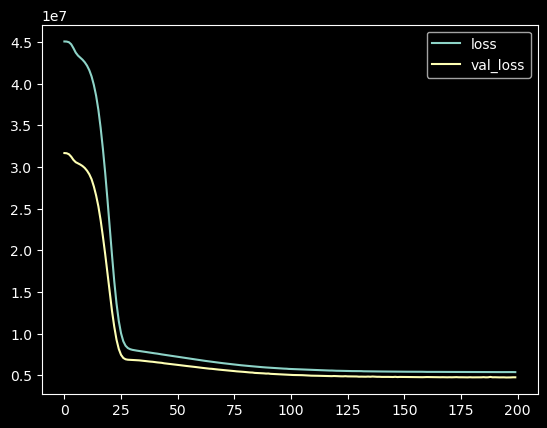

In [53]:
kayip_verisi.plot()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
tahmin_dizisi = model.predict(X_test)

507/507 [==============================] - 1s 2ms/step


In [56]:
tahmin_dizisi

array([[-246.92308],
       [-203.46947],
       [-152.88011],
       ...,
       [-146.91039],
       [-246.92284],
       [-241.87596]], dtype=float32)

In [57]:
mean_absolute_error(y_test, tahmin_dizisi)

627.7167500361735

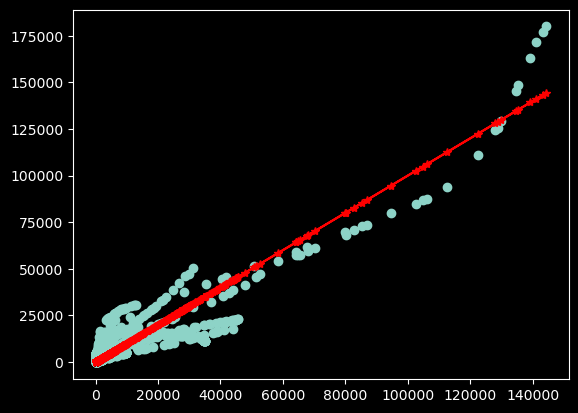

In [58]:
plt.scatter(y_test, tahmin_dizisi)
plt.plot(y_test, y_test, "r-*")